<a href="https://colab.research.google.com/github/youdanzh/Transformer-for-Therom-Proving/blob/main/backup7%3A52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import torch as tr
import matplotlib.pyplot as pt
from tqdm.notebook import trange
import numpy as np

In [ ]:
examples = []
header = True

with open("0001_small.txt", "r") as f:
  counter = 0
  clause = ""
  for line in f:
    counter += 1
    if line[0] == "T" and counter == 3:
      clause = line[2:]
    if line[0] in "+-":
      header = False
      label = 0 if line[0] == "-" else 1
    elif not header:
      clause_steps = line[2:] + " & " + clause
      #print(clause_steps)
      examples.append((clause_steps.strip(),label))
      
#for e,(example,label) in enumerate(examples[:10]):
 # print(label, example)
for i in range(10):
  print(examples[i])
len(examples)

('c= c= f0 cF c~ f0\n & c==> c/\\ cbounded f0 c~ c= * part cinterior f0 part cEMPTY c~ cretract_of * part cfrontier f0 f0', 1)
('c==> ! c==> cinterior f0 b0 * f0 b0 * / c\\/ c~ cinterior f0 b0 cI f0 b0 f1\n & c==> c/\\ cbounded f0 c~ c= * part cinterior f0 part cEMPTY c~ cretract_of * part cfrontier f0 f0', 1)
('c==> c~ c= * part cinterior f0 part cEMPTY c==> cclosed f0 c==> cbounded f0 c/\\ cclosed f0 c/\\ c~ c= * part cinterior f0 part cEMPTY cbounded f0\n & c==> c/\\ cbounded f0 c~ c= * part cinterior f0 part cEMPTY c~ cretract_of * part cfrontier f0 f0', 1)
('c==> c= cIN f0 * part cfrontier f1 f2 c==> c==> f2 c= c= * f3 f0 f0 f4 c= c==> cIN f0 * part cfrontier f1 c= * f3 f0 f0 c==> f2 f4\n & c==> c/\\ cbounded f0 c~ c= * part cinterior f0 part cEMPTY c~ cretract_of * part cfrontier f0 f0', 1)
('c==> ! c==> cinterior f0 b0 * f0 b0 c==> c~ cI f0 f1 c==> c/\\ ! c\\/ c~ cfrontier f0 b0 c= * f2 b0 b0 c/\\ ! c\\/ ! c\\/ c~ c= b0 * f2 b1 c~ * f0 b1 cfrontier f0 b0 c/\\ ccontinuous_on f2 f

337

In [ ]:
validation = []
header = True

with open("00014", "r") as f:
  counter = 0
  clause = ""
  for line in f:
    counter += 1
    if line[0] == "T" and counter == 3:
      clause = line[2:]
    if line[0] in "+-":
      header = False
      label = 0 if line[0] == "-" else 1
    elif not header:
      clause_steps = line[2:] + " & " + clause
      #print(clause_steps)
      validation.append((clause_steps.strip(),label))
      
      


In [ ]:
chrs = "".join([chr(c) for c in range(ord("a"), ord("z"))] + [chr(c) for c in range(ord("A"), ord("Z"))] + ["_"])
print(chrs)

def parse(line):
  tokens = []
  token = ""
  for c in line:
    if c in chrs: token += c
    else:
      tokens.append(token.lstrip())
      token = c
  tokens.append(token.lstrip())
  return tokens

print(parse(examples[0][0]))

abcdefghijklmnopqrstuvwxyABCDEFGHIJKLMNOPQRSTUVWXY_
['c', '=', '=', '>', 'c', '/', '\\', 'creal_ge', 'creal_of_int', 'f', '0', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '/', '\\', 'creal_ge', 'creal_of_int', 'f', '1', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '/', '\\', 'creal_ge', 'creal_of_int', 'f', '2', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '/', '\\', 'creal_ge', 'creal_of_int', 'f', '3', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '/', '\\', 'c', '/', '\\', 'creal_ge', 'creal_add', 'creal_mul', 'creal_neg', 'creal_of_num', 'cNUMERAL', 'cBIT', '1', 'c_', '0', 'creal_of_int', 'f', '2', 'creal_add', 'creal_of_int', 'f', '3', 'creal_neg', 'creal_of_num', 'cNUMERAL', 'cBIT', '1', 'c_', '0', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '=', 'creal_of_int', 'f', '1', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '/', '\\', 'c', '/', '\\', 'creal_ge', 'creal_add', 'creal_mul', 'creal_neg', 'creal_of_num', 'cNUMERAL', 'cBIT', '1', 'c_', '0', 'creal_of_int', 'f', '2', 'creal_add', 'c

In [ ]:
all_tokens = set()
for example, label in examples:
  tokens = parse(example) 
  all_tokens |= set(tokens)

for example_2, label_2 in validation:
  tokens = parse(example_2) 
  all_tokens |= set(tokens)


all_tokens = list(all_tokens)
lookup = {token: t for (t, token) in enumerate(all_tokens)}

print(lookup)
for token in all_tokens: print(token)
print(len(all_tokens))


{'': 0, 'creal_ge': 1, '3M': 2, 'creal_inv': 3, '1_prime': 4, 'c': 5, 'cscs_lo_v': 6, '6': 7, 'cNIL': 8, 'cCOND': 9, 'cscs_stab_diag_v': 10, '1': 11, 'cint_add': 12, '/': 13, '*': 14, '~': 15, '5': 16, '+': 17, 'cGABS': 18, 'cscs_bm_v': 19, 'ctgt': 20, '9': 21, 'cscs_hi_v': 22, 'cBIT': 23, 'cSUC': 24, 'cscs_prop_equ_v': 25, 'creal_div': 26, 'creal_add': 27, 'cDECIMAL': 28, 'cfunlist_v': 29, 'creal_of_num': 30, 'cscs_a_v': 31, 'cball_annulus': 32, 'b': 33, 'ch': 34, '3': 35, 'cint_lt': 36, 'cMAP': 37, 'cSND': 38, 'cMOD': 39, 'cUNIV': 40, 'creal_le': 41, '2': 42, 'cT': 43, 'cint_of_num': 44, 'cmk_unadorned_v': 45, 'cconvex_local_fan': 46, 'cNUMERAL': 47, 'ccstab': 48, 'cscs_J_v': 49, 'cunadorned_v': 50, '!': 51, 'cLET': 52, '8': 53, 'cCONS': 54, 'cint_le': 55, 'c_': 56, 'cEMPTY': 57, 'cpsort': 58, 'creal_mul': 59, 'cscs_diag': 60, 'cFST': 61, 'cIMAGE': 62, 'cIN': 63, 'part': 64, 'cdistance': 65, 'cscs_v': 66, 'cSUBSET': 67, '=': 68, 'cscs_d_v': 69, 'cF': 70, 'cscs_': 71, 'cASSOCD_v': 72,

In [ ]:
len(validation)

734

In [ ]:
max_len = max([len(parse(example)) for example,label in examples])
print("max_len:", max_len)
embeddings = tr.eye(len(all_tokens))

max_len: 651


In [ ]:
"""
Transformer utilities
"""
def embed(seq, max_len, embeddings, offset=0):
    embedded = tr.zeros(max_len, embeddings.shape[1])
    cap = min(len(seq), max_len-offset)
    if cap > 0:
        embedded[offset:offset+cap] = tr.stack(tuple(embeddings[lookup[token]] for token in seq[:cap]))
    return embedded

def Attention(Q, K, V, masked=False):
    dk = Q.shape[1]
    logits = Q @ K.t() / dk**.5
    if masked:
        idx = tr.arange(Q.shape[0])
        logits[idx.unsqueeze(1) < idx] = -tr.inf
    return tr.softmax(logits, dim=1) @ V

class MultiHeadAttention(tr.nn.Module):
    def __init__(self, num_heads, d_model, masked=False, projections=""):
        super(MultiHeadAttention, self).__init__()
        dh = d_model // num_heads
        self.masked = masked
        self.num_heads = num_heads
        self.WQ, self.WK, self.WV = tuple(
            tr.nn.ModuleList([tr.nn.Linear(d_model, dh, bias=False) for i in range(num_heads)])
            if p in projections else [lambda x: x[:,:dh]]*num_heads
            for p in "QKV")
        self.WO = tr.nn.Linear(dh * num_heads, d_model, bias=False) if "O" in projections else lambda x: x
        self.ln = tr.nn.LayerNorm(d_model)
        self.projections = projections

    def forward(self, Q, K, V):
        heads = [
            Attention(self.WQ[i](Q), self.WK[i](K), self.WV[i](V), self.masked)
            for i in range(self.num_heads)]
        out = self.WO(tr.cat(heads, dim=1))
        out += Q # skip connection
        out = self.ln(out) # layer normalization
        return out

# requires d_model - d_embedding >= max_len
def one_hot_positional_encoder(max_len):
    def encode_position(inputs):
        I = tr.eye(max_len)
        return tr.cat((I, inputs), dim=1)
    return encode_position



In [148]:
class Net(tr.nn.Module):
  def __init__(self, num_blocks, num_heads):
    super(Net, self).__init__()
    d_model = max_len+embeddings.shape[1]
    self.encoder = one_hot_positional_encoder(max_len)
    self.blocks = tr.nn.ModuleList([
      MultiHeadAttention(num_heads, d_model, projections="QKVO")
      for _ in range(num_blocks)
    ])
    self.readout = tr.nn.Linear(d_model, 2)
  def forward(self, example):
    x = embed(parse(example), max_len, embeddings)
    x = self.encoder(x)
    for mha in self.blocks:
      x = mha(x, x, x)
    y = self.readout(x).mean(dim=0).unsqueeze(0)
    return y

net = Net(3, 4)
y = net(examples[0][0])
print(y)

tensor([[-0.0183,  0.1144]], grad_fn=<UnsqueezeBackward0>)


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch:0 loss:0.6947737336158752 		val_loss: 3.5921344342379213		 val_acc: 0.51  
Epoch:20 loss:0.007130295038223267 		val_loss: 3.1358067074697464		 val_acc: 0.49  
Epoch:40 loss:0.022948985919356346 		val_loss: 1.9306889364495874		 val_acc: 0.49  
Epoch:60 loss:2.7952253818511963 		val_loss: 1.3555041518807411		 val_acc: 0.49  
Epoch:80 loss:0.9068158268928528 		val_loss: 0.8247819879651069		 val_acc: 0.49  
Epoch:100 loss:0.7821242809295654 		val_loss: 0.7283813744783402		 val_acc: 0.49  
Epoch:120 loss:0.24135403335094452 		val_loss: 0.9367168781161308		 val_acc: 0.49  
Epoch:140 loss:0.21586298942565918 		val_loss: 1.0025393158197402		 val_acc: 0.51  
Epoch:160 loss:0.6804036498069763 		val_loss: 0.7076937943696976		 val_acc: 0.49  
Epoch:180 loss:0.28175315260887146 		val_loss: 0.8621710258722305		 val_acc: 0.51  
Epoch:199 loss:0.8589518666267395 		val_loss: 0.7047405403852463		 val_acc: 0.51  


Text(0, 0.5, 'Loss')

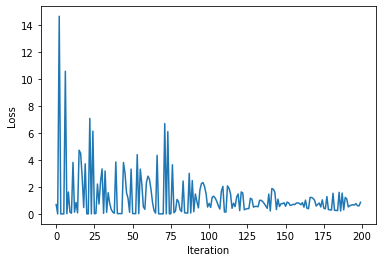

In [149]:
net = Net(2, 4)
xc = tr.nn.CrossEntropyLoss()
val = random.sample(validation,100)
opt = tr.optim.Adam(net.parameters(), lr=0.005)

num_iters = 200
verb_step = 20
train_loss = []
valid_accu =[]
valid_loss =[]
for i in trange(num_iters):

    example, label = random.choice(examples)
    logits = net(example)
    loss = xc(logits, tr.tensor([label]))
    train_loss.append(loss.item())

    opt.zero_grad()
    loss.backward()
    opt.step()
    correct = []
    vloss = []
    
    
    if i % verb_step == 0 or i == num_iters-1:
       
        with tr.no_grad():
           
            for  example_2, label_2 in val:
               logits = net(example_2)
               v_loss = xc(logits,tr.tensor([label_2]))  
               pred = logits.argmax()
               correct.append(np.absolute(label_2-pred))
               vloss.append(v_loss.item())
        valid_accu.append(1-np.mean(correct))
        valid_loss.append(np.mean(vloss))
        print(f'Epoch:{i} loss:{loss.item()} \t\tval_loss: {np.mean(vloss)}\t\t val_acc: {1-np.mean(correct)}  ')
        
              

#pt.plot(prediction)
pt.plot(train_loss)
pt.xlabel("Iteration")
pt.ylabel("Loss")



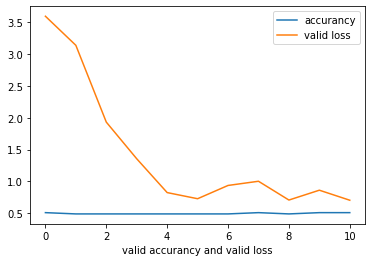

In [150]:
pt.xlabel("valid accurancy and valid loss")
pt.plot(valid_accu,label="accurancy")
pt.plot(valid_loss,label="valid loss")
pt.legend()
pt.show()

#Youdan's Approch

In [152]:
'''Youdan's Approch'''

class Net(tr.nn.Module):
  def __init__(self, num_blocks, num_heads):
    super(Net, self).__init__()
    d_model = max_len+embeddings.shape[1]
    self.conv = tr.nn.Conv1d(max_len,max_len, kernel_size=1)  
    self.conv2 = tr.nn.Conv1d(max_len, max_len, kernel_size=1)   
    self.encoder = one_hot_positional_encoder(max_len)
    self.rrelu = tr.nn.RReLU()
    self.blocks = tr.nn.ModuleList([
      MultiHeadAttention(num_heads, d_model, projections="QKVO")
      for _ in range(num_blocks)
    ])
    self.readout =tr.nn.Linear(d_model, 2)
    self.readout2 =tr.nn.Linear(2, 2)
  def forward(self, example):
    x = embed(parse(example), max_len, embeddings)
    x = self.encoder(x)
   
    for mha in self.blocks:
      x = mha(x, x, x)
    x = self.rrelu(self.conv(x))
    x = self.conv2(x)
    y = self.readout2(self.readout(x)).mean(dim=0).unsqueeze(0)
    return y

net = Net(2, 4)


0

In [154]:
net = Net(2, 4)
xc = tr.nn.CrossEntropyLoss()

opt = tr.optim.Adam(net.parameters(), lr=0.005)

num_iters = 200
verb_step = 20
train_loss = []
valid_accu =[]
valid_loss =[]
true = 0

for i in trange(num_iters):

    example, label = random.choice(examples)
    logits = net(example)
    loss = xc(logits, tr.tensor([label]))
    train_loss.append(loss.item())

    opt.zero_grad()
    loss.backward()
    opt.step()
    correct = []
    vloss = []
    
    
    if i % verb_step == 0 or i == num_iters-1:
       
        with tr.no_grad():

            for  example_2, label_2 in val:
               logits = net(example_2)
               v_loss = xc(logits,tr.tensor([label_2]))  
               pred = logits.argmax().item()
               correct.append(np.absolute(label_2-pred))
               vloss.append(v_loss.item())
        valid_accu.append(1-np.mean(correct))
        valid_loss.append(np.mean(vloss))
        print(f'Epoch:{i} loss:{loss.item()} \t\tval_loss: {np.mean(vloss)}\t\t val_acc: {1-np.mean(correct)}  ')
        
              

#pt.plot(prediction)
pt.plot(train_loss)
pt.xlabel("Iteration")
pt.ylabel("Loss")

  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

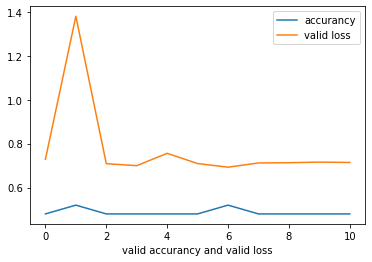

In [ ]:
pt.xlabel("valid accurancy and valid loss")
pt.plot(valid_accu,label="accurancy")
pt.plot(valid_loss,label="valid loss")
pt.legend()
pt.show()

In [ ]:
net = Net(4, 8)
xc = tr.nn.CrossEntropyLoss()

opt = tr.optim.Adam(net.parameters(), lr=0.001)

num_iters = 1000
verb_step = 20
train_loss = []
valid_accu =[]
valid_loss =[]
for i in trange(num_iters):

    example, label = random.choice(examples)
    logits = net(example)
    loss = xc(logits, tr.tensor([label]))
    train_loss.append(loss.item())

    opt.zero_grad()
    loss.backward()
    opt.step()
    correct = []
    vloss = []
    
    
    if i % verb_step == 0 or i == num_iters-1:
       
        with tr.no_grad():
            for example_2, label_2 in val:
               logits = net(example_2)
               v_loss = xc(logits,tr.tensor([label_2]))  
               pred = logits.argmax()
               correct.append(np.absolute(label_2-pred))
               vloss.append(v_loss.item())
        valid_accu.append(1-np.mean(correct))
        valid_loss.append(np.mean(vloss))
        print(f'loss:{loss.item()} \t\tval_loss: {np.mean(vloss)}\t\t val_acc: {1-np.mean(correct)}  ')
        
              

#pt.plot(prediction)
pt.plot(train_loss)
pt.xlabel("Iteration")
pt.ylabel("Loss")


In [ ]:
pt.xlabel("valid accurancy and valid loss")
pt.plot(valid_accu,label="accurancy")
pt.plot(valid_loss,label="valid loss")
pt.legend()
pt.show()